Your Name and PRN:
- Name : Anurag Sahu
- PRN  : 250840128011
- Date : 13 Nov 2025 

## Q1: Is this model more accurate compared to previous model? 
#### Ans: yes
## Q2: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.
#### Ans: based on my observation i am getting the best train acc(0.91) and  test acc(0.95) at Dim_of_hidden_layers=1,Learninig rate=0.1

In [85]:
result_df.sort_values(by= 'Test_Acc',ascending=False)

,Train_Acc,Test_Acc,Dim_of_hidden_layer,Learning_Rate
3,0.91000,0.950,1,0.1000
0,0.86625,0.930,1,0.0001
14,0.87625,0.930,4,0.0100
8,0.88875,0.930,3,0.0001
34,0.87625,0.930,9,0.0100
23,0.87000,0.930,6,0.1000
1,0.86500,0.925,1,0.0010
7,0.86625,0.925,2,0.1000
26,0.86000,0.925,7,0.0100
33,0.86125,0.925,9,0.0010


# Q3: What lines will you change to convert it into multi-class prediction model?
## 1.Output Activation function ( sigmoid -> softmax)

#### def fun_softmax(z):
####  exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))  # Subtracting the max for numerical stability
####   return exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # Normalize by dividing by the sum of exponents 


## 2.Binary cross entropy to categorical cross entropy

#### data_loss = -np.sum(y * np.log(a2))

## 3.Prediction Logic
### return np.argmax(a2, axis=1)


## Q4: How many epochs are sufficient?
#### Ans: the loss curve become flatten after 3000 epochs 

In [1]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.datasets import make_moons
from sklearn.model_selection import  train_test_split # Import function to split dataset into training and testing subsets
from sklearn.metrics import * # Import function to calculate various metric

In [ ]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input'
inpDir = Path('.') / '..' / 'input'
# outDir = '../output'
outDir = Path('.') / 'output'

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)  # Set Random Seed for reproducible  results
rng = np.random.default_rng(RANDOM_STATE)

TEST_SIZE = 0.2  # Size of test data
NOISE = 0.2
EPOCHS = 100
ALPHA = 0.01  # Learning Rate
N_SAMPLE = 1000  #

# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium'
          }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid')  # plt.style.use('ggplot')

In [5]:
def fn_plot_decision_boundary(x: np.ndarray, wts: np.ndarray, pred_func):
    """
    Plots the decision boundary for a classification model along with the data points.

    Args:
        x (np.ndarray): Input feature matrix with shape (n_samples, 3)
        wts (np.ndarray): Weights matrix
        pred_func: Function to predict using weights and datapoints
    """

    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots(figsize=(8, 5))

    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.05
    padding = 2 * dm

    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = x[:, 0].min() - padding, x[:, 0].max() + padding

    # Calculate the range for y-axis (second feature) with padding
    y_min, y_max = x[:, 1].min() - padding, x[:, 1].max() + padding

    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))

    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()]  # Resulting shape: (n_points, 2)

    # Add a column of ones to the coordinate array for the bias term
    XX = np.hstack((XX, np.ones((XX.shape[0], 1))))  # make array compatible

    # List to collect predictions for each point in the mesh grid
    y_pred = []

    # Iterate over each coordinate point in the mesh grid
    for row in XX:
        # Make prediction for the current coordinate using global 'weights' and 'predict' function
        y_p = pred_func(row, wts)
        y_pred.append(y_p)

    # Reshape predictions to match the original mesh grid dimensions
    Z = np.array(y_pred).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)

    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(x[:, 0], x[:, 1], c=x[:, 2], s=20, edgecolor='k', cmap=plt.cm.bwr)

    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')
    ax.set_ylabel('B')

    # Display the final plot
    plt.show()

In [ ]:
X,y= make_moons(1000,noise = NOISE,random_state=RANDOM_STATE,shuffle=True)
X.shape,y.shape

((1000, 2), (1000,))

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,random_state=RANDOM_STATE,stratify=y)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [33]:
def fun_sigmoid(z):
    return 1/(1+np.exp(-z))

def fun_activ(z):
    return np.tanh(z)

def fun_activ_prime(z):
    return 1.0 - np.tanh(z)**2

In [81]:
def predict(model,x):
    W1 = model['W1']
    W2 = model['W2']
    B1 = model['B1']
    B2 = model['B2']

    z1 = x.dot(W1) + B1
    a1 = fun_activ(z1)

    z2 = a1.dot(W2) + B2
    a2 = fun_sigmoid(z2)

    return a2>=0.5

In [46]:
def calculate_loss(model,X,y):
    W1 = model['W1']
    W2 = model['W2']
    B1 = model['B1']
    B2 = model['B2']
    m=X.shape[0]

    z1 = X.dot(W1) + B1
    a1 = fun_activ(z1)

    z2 = a1.dot(W2) + B2
    a2 = fun_sigmoid(z2)

    data_loss = -(y * np.log(a2) + (1-y) * np.log(1-a2)).sum()
    return data_loss/m



In [47]:
loss_hist={}
y_train=y_train.reshape(-1,1)

In [75]:
def build_model(nn_hdim,X,y,alpha,n_epochs):
    m,nn_input_dim = X.shape
    nn_output_dim = y.shape[1]

    w1 = rng.random((nn_input_dim,nn_hdim)) / np.sqrt(nn_input_dim)
    w2 = rng.random((nn_hdim,nn_output_dim)) / np.sqrt(nn_hdim)

    b1 = rng.random((1,nn_hdim))
    b2 = rng.random((1,nn_output_dim))

    loss,epoch =[],[]
    model = {"W1": w1,
                "W2": w2,
                "B1": b1,
                "B2": b2}

    for i in range(0,n_epochs):
        ## Forward Porpogation 
        z1 = X.dot(w1) + b1
        a1 = fun_activ(z1)

        z2 = a1.dot(w2) + b2
        a2 = fun_sigmoid(z2)

        ## backward propogation
        dz2 = a2 - y
        
        ## layer 2
        dw2 = (a1.T).dot(dz2)
        db2 = np.sum(dz2,keepdims=True,axis=0)

        da1 = (dz2).dot(w2.T)

        ## layer 1
        dz1 = da1 * fun_activ_prime(z1)
        dw1 = (X.T).dot(dz1)
        db1 = np.sum(dz1,keepdims=True,axis=0)

        ## Parameter updates 
        w1 -= (alpha * dw1 / m)
        w2 -= (alpha * dw2 / m)
        b1 -= (alpha * db1 / m)
        b2 -= (alpha * db2 / m)

        model = {"W1": w1,
                "W2": w2,
                "B1": b1,
                "B2": b2}
        
        if not i%1000 :
            curr_loss = calculate_loss(model,X,y)
            epoch.append(i)
            loss.append(curr_loss)
            print(f"loss:{loss}, for epoch :{i}")
    
    loss_hist={}
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    return model,loss_hist

In [76]:
model,loss_hist=build_model(4,X_train,y_train,alpha=0.01,n_epochs=20000)

loss:[np.float64(0.844277336460588)], for epoch :0
loss:[np.float64(0.844277336460588), np.float64(0.5288092677688025)], for epoch :1000
loss:[np.float64(0.844277336460588), np.float64(0.5288092677688025), np.float64(0.37127151983441486)], for epoch :2000
loss:[np.float64(0.844277336460588), np.float64(0.5288092677688025), np.float64(0.37127151983441486), np.float64(0.3292290681751238)], for epoch :3000
loss:[np.float64(0.844277336460588), np.float64(0.5288092677688025), np.float64(0.37127151983441486), np.float64(0.3292290681751238), np.float64(0.31950728316575616)], for epoch :4000
loss:[np.float64(0.844277336460588), np.float64(0.5288092677688025), np.float64(0.37127151983441486), np.float64(0.3292290681751238), np.float64(0.31950728316575616), np.float64(0.3166455862907722)], for epoch :5000
loss:[np.float64(0.844277336460588), np.float64(0.5288092677688025), np.float64(0.37127151983441486), np.float64(0.3292290681751238), np.float64(0.31950728316575616), np.float64(0.3166455862907

In [77]:
model['W1'].shape,model['W2'].shape,model["B1"].shape,model['B2'].shape

((2, 4), (4, 1), (1, 4), (1, 1))

In [78]:
loss_df=pd.DataFrame(loss_hist)
loss_df

,epoch,loss
0,0,0.844277
1,1000,0.528809
2,2000,0.371272
3,3000,0.329229
4,4000,0.319507
5,5000,0.316646
6,6000,0.315317
7,7000,0.314397
8,8000,0.313633
9,9000,0.312959


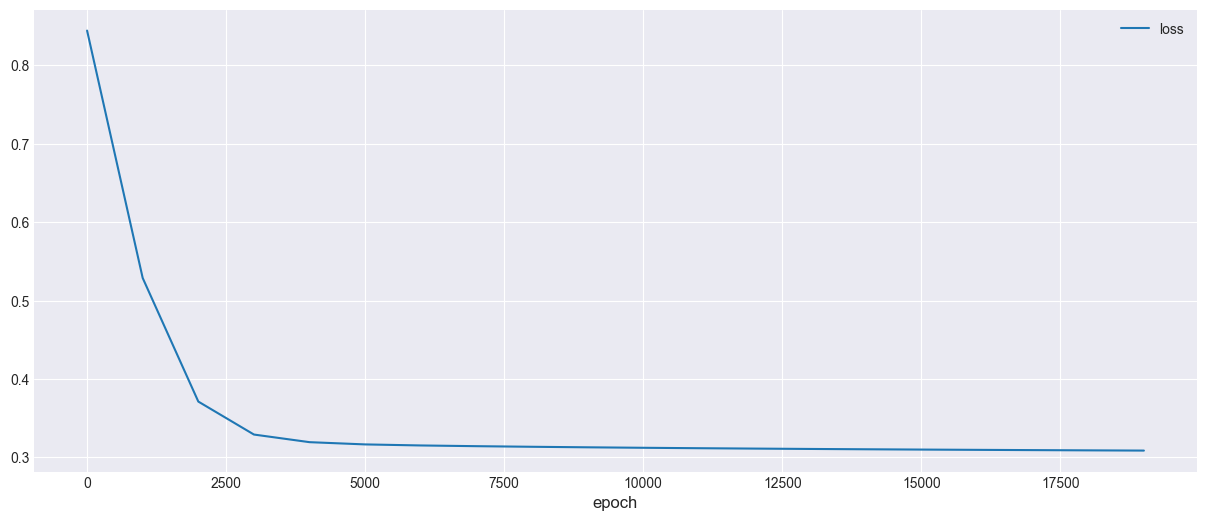

In [79]:
loss_df.plot(x = 'epoch', y = 'loss')
plt.show()

In [80]:
loss_df.sort_values(by='loss',ascending=True)

,epoch,loss
19,19000,0.308783
18,18000,0.309074
17,17000,0.309383
16,16000,0.309713
15,15000,0.310067
14,14000,0.310449
13,13000,0.310863
12,12000,0.311314
11,11000,0.311809
10,10000,0.312354


In [82]:
from collections import defaultdict
result_df = defaultdict(list)

for n in range(1,11):
    for l in [0.0001,0.001,0.01,0.1]:
        model,loss_hist=build_model(4,X_train,y_train,alpha=0.01,n_epochs=20000)
        y_pred_train = predict(model,X_train)
        result_df['Train_Acc'].append(accuracy_score(y_train,y_pred_train))
        
        y_pred_test = predict(model,X_test)
        result_df['Test_Acc'].append(accuracy_score(y_test,y_pred_test))


        result_df['Dim_of_hidden_layer'].append(n)
        result_df['Learning_Rate'].append(l)

result_df = pd.DataFrame(result_df)

loss:[np.float64(0.7951422587394734)], for epoch :0
loss:[np.float64(0.7951422587394734), np.float64(0.5792439972301372)], for epoch :1000
loss:[np.float64(0.7951422587394734), np.float64(0.5792439972301372), np.float64(0.37866876091617074)], for epoch :2000
loss:[np.float64(0.7951422587394734), np.float64(0.5792439972301372), np.float64(0.37866876091617074), np.float64(0.3379976534092925)], for epoch :3000
loss:[np.float64(0.7951422587394734), np.float64(0.5792439972301372), np.float64(0.37866876091617074), np.float64(0.3379976534092925), np.float64(0.3256462884050717)], for epoch :4000
loss:[np.float64(0.7951422587394734), np.float64(0.5792439972301372), np.float64(0.37866876091617074), np.float64(0.3379976534092925), np.float64(0.3256462884050717), np.float64(0.3208759033659764)], for epoch :5000
loss:[np.float64(0.7951422587394734), np.float64(0.5792439972301372), np.float64(0.37866876091617074), np.float64(0.3379976534092925), np.float64(0.3256462884050717), np.float64(0.320875903